# **Importing libraries** **and loading datasets** 

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
#import libraries to our working environment
import pandas as pd

import numpy as np

In [45]:
#loading dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data/Autolib_dataset.csv')

## **Previewing the dataset**

In [46]:
#previewing dataset
df.head()

,Address,Cars,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [47]:
#Looking at the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              5000 non-null   object
 1   Cars                 5000 non-null   int64 
 2   Bluecar counter      5000 non-null   int64 
 3   Utilib counter       5000 non-null   int64 
 4   Utilib 1.4 counter   5000 non-null   int64 
 5   Charge Slots         5000 non-null   int64 
 6   Charging Status      5000 non-null   object
 7   City                 5000 non-null   object
 8   Displayed comment    111 non-null    object
 9   ID                   5000 non-null   object
 10  Kind                 5000 non-null   object
 11  Geo point            5000 non-null   object
 12  Postal code          5000 non-null   int64 
 13  Public name          5000 non-null   object
 14  Rental status        5000 non-null   object
 15  Scheduled at         47 non-null     object
 16  Slots 

### **Data Cleaning**

1.   **Consistency**




In [48]:
#Duplicates
#The columns cars and Blue Car Counter both contain values that are a duplicate of each other.
#Therefore,one of the columns will be dropped as shown below
df = df.drop(columns=['Cars'])
#Previewing the new table
df.head()

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23


In [49]:
#Checking for duplicate rows and dropping them
df1 = df.drop_duplicates()
#To check shape
df1.shape
df1
#From output no rows are dropped hence no duplicates.

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,Displayed comment,ID,Kind,Geo point,Postal code,Public name,Rental status,Scheduled at,Slots,Station type,Status,Subscription status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,NaN,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,NaN,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,NaN,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,NaN,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,NaN,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,NaN,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,1,operational,Paris,NaN,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,NaN,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,0,nonexistent,Paris,NaN,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,NaN,3,station,ok,nonexistent,2018,4,8,17,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,8 avenue MÃ©nelotte,2,0,0,0,nonexistent,Colombes,NaN,colombes-menelotte-8,STATION,"48.9246525, 2.259313",92700,Colombes/MÃ©nelotte/8,operational,NaN,3,station,ok,nonexistent,2018,4,6,11,26
4996,37 rue de Dantzig,4,0,0,1,operational,Paris,NaN,paris-dantzig-37,STATION,"48.8335103, 2.2987201",75015,Paris/Dantzig/37,operational,NaN,2,station,ok,nonexistent,2018,4,4,16,56
4997,142 rue du Bac,1,0,0,1,operational,Paris,NaN,paris-bac-142,STATION,"48.8508194, 2.3237968",75007,Paris/Bac/142,operational,NaN,4,station,ok,nonexistent,2018,4,1,7,1
4998,2 avenue du Val de Fontenay,2,0,0,0,nonexistent,Fontenay-Sous-Bois,NaN,fontenaysousbois-valdefontenay-2,STATION,"48.8528247, 2.4869085",94120,Fontenay-Sous-Bois/Val de Fontenay/2,operational,NaN,3,station,ok,nonexistent,2018,4,4,17,27




2.   **Validity**




In [50]:
#Here we select only the rows where the Status is not scheduled
df2 = df1[df1.Status != 'scheduled']
#Checking shape to ensure the we only have the relevant rows
df2.shape
#47 rows where the status was scheduled have been removed

(4953, 24)

In [51]:
#We can also drop the column 'Scheduled at' now that it's no longer relevant
#We can also drop the column 'Displayed comment'
df2 = df2.drop(columns=['Scheduled at', 'Displayed comment'])
#Checking the shape to make sure that the column has been removed
df2.shape
#Two columns have been removed successfully


(4953, 22)

#We can discover outliers using data visualization tools


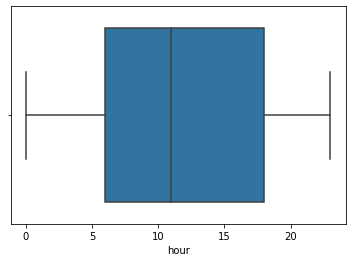

In [52]:
#First import seaborn library
import seaborn as sns

#Plot the boxplot using one column .On this case we used bluecar_counter
sns.boxplot(x=df2['hour'])

In [53]:
Q1 = df2.quantile(0.25)
Q3 = df2.quantile(0.75)

IQR = Q3 - Q1


(df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))


# The two commented lines of code below can be used to drop the outliers but for now I will not drop them since the data
#does not seem to have extreem outliers.This is due to the range of each column.

# df2_no_outlier = Electric[~((df2 < (Q1 - 1.5 * IQR)) | (df2 > (Q3 + 1.5 * IQR))).any(axis = 1)]

# print(df2_no_outlier)

,Address,Bluecar counter,Charge Slots,Charging Status,City,Geo point,ID,Kind,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,Utilib 1.4 counter,Utilib counter,day,hour,minute,month,year
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False




**3.Uniformity**



In [54]:
#Changing column names
df2.columns = [c.replace(' ', '_') for c in df2.columns]
df2.head()

,Address,Bluecar_counter,Utilib_counter,Utilib_1.4_counter,Charge_Slots,Charging_Status,City,ID,Kind,Geo_point,Postal_code,Public_name,Rental_status,Slots,Station_type,Status,Subscription_status,year,month,day,hour,minute
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37
4,6 avenue de la Porte de Champerret,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23


In [38]:
#Combining the columns year,day and time into one column
#And changing the column to datatime datatype
df2['DateTime']=pd.to_datetime(df2[['year','month','day', 'hour', 'minute']])
df2.head()

,Address,Bluecar counter,Utilib counter,Utilib 1.4 counter,Charge Slots,Charging Status,City,ID,Kind,Geo point,Postal code,Public name,Rental status,Slots,Station type,Status,Subscription status,year,month,day,hour,minute,DateTime
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43,2018-04-08 11:43:00
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24,2018-04-06 07:24:00
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14,2018-04-03 20:14:00
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37,2018-04-04 04:37:00
4,6 avenue de la Porte de Champerret,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23,2018-04-08 17:23:00


In [55]:
#Dropping columns with year,month,day,hour,minute
# df2 = df2.drop(columns=['year', 'month', 'day', 'hour', 'minute'])
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4953 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Address              4953 non-null   object
 1   Bluecar_counter      4953 non-null   int64 
 2   Utilib_counter       4953 non-null   int64 
 3   Utilib_1.4_counter   4953 non-null   int64 
 4   Charge_Slots         4953 non-null   int64 
 5   Charging_Status      4953 non-null   object
 6   City                 4953 non-null   object
 7   ID                   4953 non-null   object
 8   Kind                 4953 non-null   object
 9   Geo_point            4953 non-null   object
 10  Postal_code          4953 non-null   int64 
 11  Public_name          4953 non-null   object
 12  Rental_status        4953 non-null   object
 13  Slots                4953 non-null   int64 
 14  Station_type         4953 non-null   object
 15  Status               4953 non-null   object
 16  Subscr



4.  **Accuracy**




In [56]:
#Dropping all rows where the value of "Bluecar counter" is less than 0 or greater than 7
nr = df2[(df2['Bluecar_counter'] < 0) & (df2['Bluecar_counter'] > 7) ].index
df2.drop(nr , inplace=True)
#Checking if any of the rows dropped
df2.shape
#From the result all rows are accurate and within range

(4953, 22)

In [57]:
#Dropping all rows where the value of "Bluecar counter" is less than 0 or greater than 7
nr = df2[(df2['Utilib_counter'] < 0) & (df2['Utilib_counter'] > 4) ].index
df2.drop(nr , inplace=True)
#Checking if any of the rows dropped
df2.shape
#From the result all rows are accurate and within range

(4953, 22)

In [59]:
#Dropping all rows where the value of "Bluecar counter" is less than 0 or greater than 7
nr = df2[(df2['Utilib_1.4_counter'] < 0) & (df2['Utilib_1.4_counter'] > 5) ].index
df2.drop(nr , inplace=True)
#Checking if any of the rows dropped
df2.shape
#From the result all rows are accurate and within range

(4953, 22)

In [60]:
#Dropping all rows where the value of "Bluecar counter" is less than 0 or greater than 7
nr = df2[(df2['Charge_Slots'] < 0) & (df2['Charge_Slots'] > 3) ].index
df2.drop(nr , inplace=True)
#Checking if any of the rows dropped
df2.shape
#From the result all rows are accurate and within range

(4953, 22)

**Note**: All the resources in the records are within range

# **Analysis**



1.   **Identify the most popular hour of the day for picking up a shared electric car (Bluecar) in the city of Paris over the month of April 2018.**




In [63]:
#The most popular hour of the day for picking up a shared blue electric car in the city of paris in the month of april 2018
#First filter to only paris 
new_Autolib_paris = df2[df2['City'] =='Paris'] 
new_Autolib_paris

#Group by hour to find the most used bluecars
Paris_hour = new_Autolib_paris.groupby(['hour'])['Bluecar_counter'].sum().diff().sort_values(ascending = False)
Paris_hour.head(1)

#The most popular hour is 21. It has the highest positive value

hour
21    119.0
Name: Bluecar_counter, dtype: float64

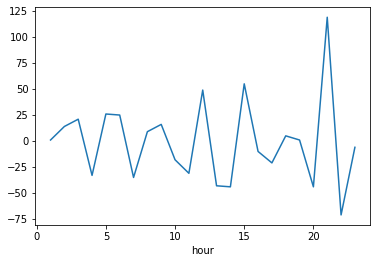

In [64]:
#We can plot above output to find the most popular hour of the day for picking up blue cars in paris

Paris_hour = new_Autolib_paris.groupby(['hour'])['Bluecar_counter'].sum().diff().plot()
Paris_hour

In [67]:
# Creating a new column where we find the difference in the number of bluecars at the station/counter

df2['Bluecar_Diff'] = df2['Bluecar_counter'].diff()
df2.head()

,Address,Bluecar_counter,Utilib_counter,Utilib_1.4_counter,Charge_Slots,Charging_Status,City,ID,Kind,Geo_point,Postal_code,Public_name,Rental_status,Slots,Station_type,Status,Subscription_status,year,month,day,hour,minute,Bluecar_Diff
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43,NaN
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24,6.0
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14,-3.0
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37,0.0
4,6 avenue de la Porte de Champerret,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23,0.0


# Question 2
**What is the most popular hour for returning cars?**

In [69]:
# What is the most popular hour for returning cars?


df2['total_cars'] = df2.iloc[:,2:4].sum(axis = 1)
df2.head()

,Address,Bluecar_counter,Utilib_counter,Utilib_1.4_counter,Charge_Slots,Charging_Status,City,ID,Kind,Geo_point,Postal_code,Public_name,Rental_status,Slots,Station_type,Status,Subscription_status,year,month,day,hour,minute,Bluecar_Diff,total_cars
0,2 Avenue de Suffren,0,0,0,0,nonexistent,Paris,paris-suffren-2,STATION,"48.857, 2.2917",75015,Paris/Suffren/2,operational,2,station,ok,nonexistent,2018,4,8,11,43,NaN,0
1,145 Rue Raymond Losserand,6,0,0,0,operational,Paris,paris-raymondlosserand-145,STATION,"48.83126, 2.313088",75014,Paris/Raymond Losserand/145,operational,0,station,ok,nonexistent,2018,4,6,7,24,6.0,0
2,2 Avenue John Fitzgerald Kennedy,3,0,2,0,operational,Le Bourget,lebourget-johnfitzgeraldkennedy-2,STATION,"48.938103, 2.4286035",93350,Le Bourget/John Fitzgerald Kennedy/2,operational,1,station,ok,nonexistent,2018,4,3,20,14,-3.0,2
3,51 Rue EugÃ¨ne OudinÃ©,3,1,0,1,operational,Paris,paris-eugeneoudine-51,STATION,"48.8250327, 2.3725162",75013,Paris/EugÃ¨ne OudinÃ©/51,operational,2,station,ok,nonexistent,2018,4,4,4,37,0.0,1
4,6 avenue de la Porte de Champerret,3,0,0,0,nonexistent,Paris,paris-portedechamperret-6,PARKING,"48.8862632, 2.2874511",75017,Paris/Porte de Champerret/6,operational,3,station,ok,nonexistent,2018,4,8,17,23,0.0,0


In [70]:
cars = df2.groupby(['hour'])['total_cars'].sum().diff().sort_values(ascending=True)
cars.head(1)
#The most popular hour for returning is hour 14hrs. Has the highest positive total

hour
23   -24.0
Name: total_cars, dtype: float64

# Question 3
**What station is the most popular?**

*   Overall
*   At the most popular picking hour?


In [73]:

Popular_station = df2.groupby(['ID','hour'])['total_cars'].sum().sort_values(ascending = False)
Popular_station.head()

ID                                 hour
paris-jeanjacquesrousseau-62       14      6
sevres-granderue-123               0       6
sevres-wolfenbuttel-1              10      3
boulognebillancourt-republique-24  14      3
nanterre-julesquentin-33           22      3
Name: total_cars, dtype: int64

ID                                 hour
paris-jeanjacquesrousseau-62       14      6
sevres-granderue-123               0       6
sevres-wolfenbuttel-1              10      3
boulognebillancourt-republique-24  14      3
nanterre-julesquentin-33           22      3
Name: total_cars, dtype: int64

In [74]:
# Finding the most popular hour
popular_hour = df2.groupby(['hour'])['total_cars'].sum().diff().sort_values(ascending = False)
popular_hour.head(1)
#Most popular hour is one with highest negative value. This is 21

hour
5    21.0
Name: total_cars, dtype: float64

# Question 4
**What station is the most popular? At the most popular picking hour?**

In [75]:
#Autolib_paris[(Autolib_paris['Kind'] == 'STATION') & (Autolib_paris['Status'] == 'ok') & (Autolib_paris['hour'] == 4)].groupby('Public name')['Public name'].count().sort_values(ascending= False)
## Subsetting the most popular picking hour (8)

Hour = df2[(df2.hour == 14)]
Hour.head()

,Address,Bluecar_counter,Utilib_counter,Utilib_1.4_counter,Charge_Slots,Charging_Status,City,ID,Kind,Geo_point,Postal_code,Public_name,Rental_status,Slots,Station_type,Status,Subscription_status,year,month,day,hour,minute,Bluecar_Diff,total_cars
63,147 rue de Paris,3,0,0,0,nonexistent,Charenton-le-Pont,charentonlepont-paris-147,STATION,"48.82687, 2.405368",94220,Charenton-le-Pont/Paris/147,operational,0,station,ok,nonexistent,2018,4,2,14,38,0.0,0
80,4 Rue Lobau,0,0,0,0,nonexistent,Paris,paris-lobau-parking,PARKING,"48.85608, 2.35342",75004,Paris/Lobau/Parking,broken,0,station,closed,broken,2018,4,8,14,3,0.0,0
126,38 Rue RÃ©aumur,0,0,0,2,operational,Paris,paris-reaumur-38,STATION,"48.8653769, 2.3573678",75003,Paris/RÃ©aumur/38,operational,6,station,ok,nonexistent,2018,4,2,14,32,-1.0,0
129,19 Rue des Filles du Calvaire,1,1,0,1,operational,Paris,paris-fillesducalvaire-19,STATION,"48.8628, 2.3660304",75003,Paris/Filles du Calvaire/19,operational,1,station,ok,nonexistent,2018,4,5,14,51,-1.0,1
140,44 rue de Fontenay,2,0,1,0,nonexistent,Vincennes,vincennes-fontenay-44,STATION,"48.84779, 2.44345",94300,Vincennes/Fontenay/44,operational,0,station,ok,nonexistent,2018,4,7,14,50,1.0,1


In [77]:
#Most popular station hour
popular_station_hour = Hour.groupby(['Public_name'])['total_cars'].sum().sort_values(ascending = False)
popular_station_hour.head()

Public_name
Paris/Jean-Jacques Rousseau/62         6
Boulogne-Billancourt/RÃ©publique/24    3
Paris/Constantinople/4                 2
Villejuif/Marcel Paul/6                2
Ville-d'Avray/Charles de Gaulle/1      2
Name: total_cars, dtype: int64

In [78]:
# Finding the most popular city

popular_city = df2.groupby(['City'])['total_cars'].sum().sort_values(ascending = False)
popular_city.head()

City
Paris                   471
Nanterre                 29
SÃ¨vres                  24
Suresnes                 20
Boulogne-Billancourt     18
Name: total_cars, dtype: int64

In [80]:
# Most popular postal code

popular_code = df2.groupby(['hour','Postal_code'])['Bluecar_counter'].sum().diff().sort_values(ascending = True)
popular_code.head()

hour  Postal_code
7     92120         -43.0
20    94110         -38.0
6     78000         -38.0
13    92100         -35.0
11    75018         -32.0
Name: Bluecar_counter, dtype: float64